In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('../data/heart_disease_cleaned.csv')
print(df.head())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [15]:
df['target']=df['num'].apply(lambda x: 0 if x==0 else 1)

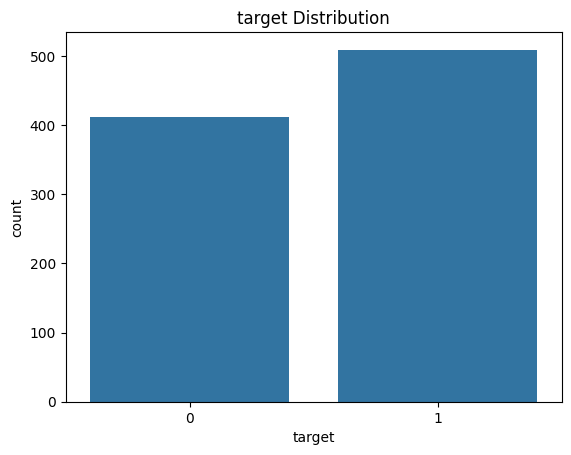

target
1    55.326087
0    44.673913
Name: proportion, dtype: float64

In [17]:
sns.countplot(x='target',data=df)
plt.title("target Distribution")
plt.show()
df['target'].value_counts(normalize='True')*100

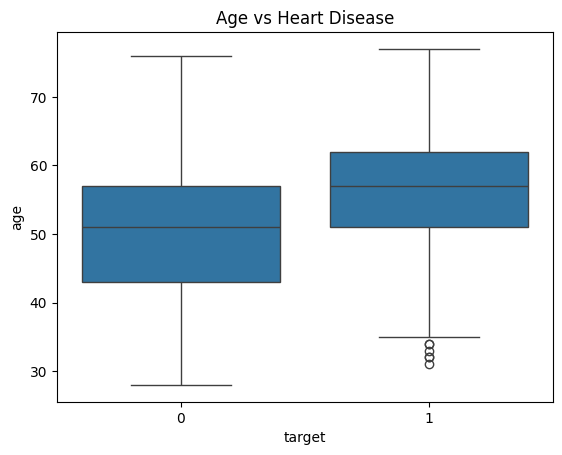

target
0    50.547445
1    55.903733
Name: age, dtype: float64


In [ ]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()
op=df.groupby('target')['age'].mean()
print(op)

#Patients with heart disease (target = 1) have a higher median age.
#Most heart disease cases fall roughly between 50–60 years.
#Patients without heart disease are generally younger.
#Few younger outliers exist in heart disease cases, but they are rare.


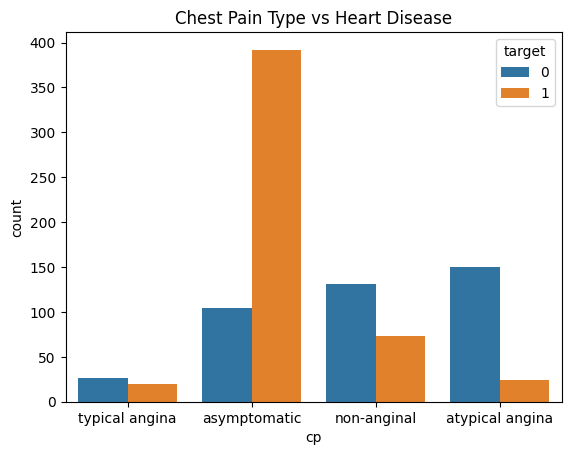

target                   0          1
cp                                   
asymptomatic     20.967742  79.032258
atypical angina  86.206897  13.793103
non-anginal      64.215686  35.784314
typical angina   56.521739  43.478261


In [ ]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()
output=pd.crosstab(df['cp'],df['target'],normalize='index')*100
print(output)

#Asymptomatic patients have the highest number of heart disease cases.
#Typical and atypical angina mostly belong to no heart disease category.
#Non-anginal pain shows mixed results, but fewer disease cases compared to asymptomatic.
#Chest pain type clearly separates healthy vs diseased patients.

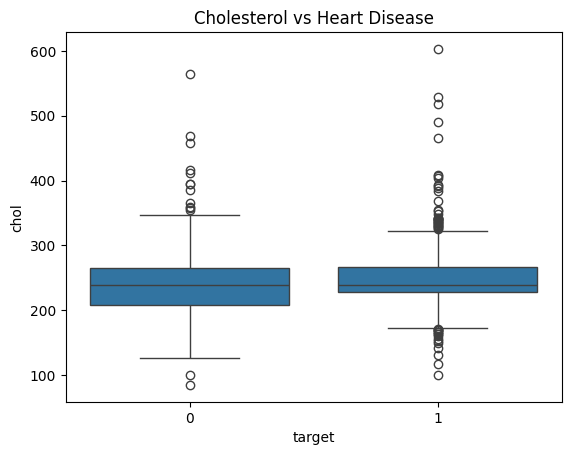

target
0    240.096107
1    249.362475
Name: chol, dtype: float64


In [ ]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()
op=df.groupby('target')['chol'].mean()
print(op)

#Average cholesterol is slightly higher in patients with heart disease.
#Large overlap exists between both groups.
#Many outliers (very high cholesterol) are present in both classes.
#Cholesterol alone does not clearly separate diseased and non-diseased patients.